In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy import *
from qutip import *

from IPython.display import Image
import os
import imageio


from matplotlib.colors import LinearSegmentedColormap

In [3]:
def save_figs(psis,save_folder = 'gif_temp'):
    def bloch_shape(b):
        b.sphere_alpha = 0.1
        b.vector_width = 8
        b.vector_color = ['r']
    # save temperal pictures
    b = Bloch()
    

    bloch_shape(b)
    for i in np.arange(len(psis)):
        if i %10 == 0:
            print(i)
        b.clear()
        b.add_states(ket2dm(psis[i]))
        name = '0'*(4-len(str(i)) ) + str(i) 
        name = save_folder+'//'+name+'b'

        b.save(dirc=save_folder,name = name)
    return
    
def save_Gifs(input_folder =  'gif_temp',output_name = 'Normal_pic',duration= 0.02):    
    filenames = sorted((fn for fn in os.listdir(input_folder+'//') if fn.endswith('.png')))
    images = []
    for filename in filenames:
        images.append(imageio.imread(input_folder+'//'+filename))

    imageio.mimsave(output_name+'.gif', images,duration=duration)
    return

# 1. Hamltonian evolution

In [4]:
def hami(wq = 5, Amp = 0.2):
    def pulse(t,args):
        return Amp*np.cos(wq*t)
    return [0.5*wq*sigmaz(),[sigmax(),pulse]]
    
wq = 5
psi0 = basis(2,0)
tlist = np.linspace(0,10,100)
h1 = hami(wq=wq,Amp=2*np.pi*0.05)
res = mesolve(h1,psi0,tlist)
psis = res.states

psis_rotframe = [rz(-tlist[idx]*wq) * psis[idx] for idx in np.arange(len(psis))]

no collapse operator, using sesolve


# 2.  You need to create two folders named "gif_temp", "gif_temp2" to store the temp pictures

In [90]:
save_figs(psis,save_folder = 'gif_temp')



0
10
20
30
40
50
60
70
80
90


In [91]:
save_figs(psis_rotframe,save_folder = 'gif_temp2')

0
10
20
30
40
50
60
70
80
90


# 3. Output GIF

In [87]:
output_name = 'Normal_picb'
save_Gifs(input_folder =  'gif_temp',output_name = output_name,duration= 0.1)

Image(url=output_name+'.gif') 

In [93]:
output_name = 'Rotating_pic1'
save_Gifs(input_folder =  'gif_temp2',output_name = output_name,duration= 0.1)

Image(url=output_name+'.gif') 

# 4. Show in static pictures

In [5]:
wq = 5
psi0 = basis(2,0)
tlist = np.linspace(0,10,1000)
h1 = hami(wq=wq,Amp=2*np.pi*0.05)
res = mesolve(h1,psi0,tlist)
psis = res.states

psis_rotframe = [rz(-tlist[idx]*wq) * psis[idx] for idx in np.arange(len(psis))]

no collapse operator, using sesolve


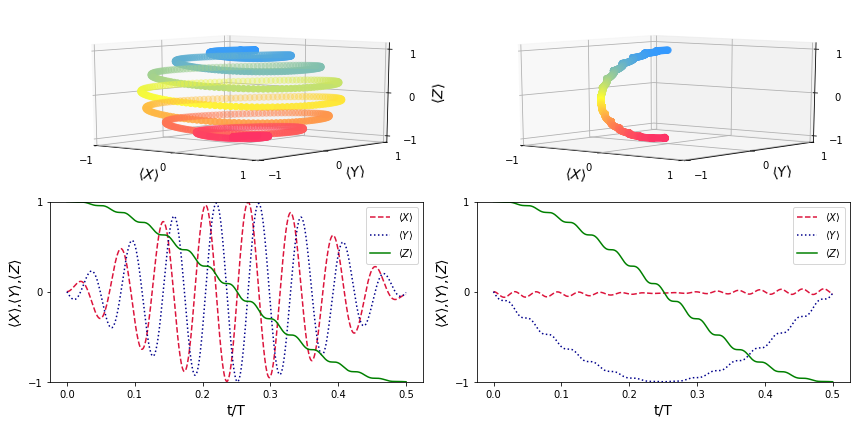

In [8]:
def plot_style():
    fontsize = 14
    plt.xlim(-1,1)
    plt.ylim(-1,1)

    plt.xlabel(r'$\langle X \rangle$',fontsize=fontsize)
    plt.ylabel(r'$\langle Y \rangle$',fontsize=fontsize)
    ax.set_zlabel(r'$\langle Z \rangle$',fontsize=fontsize)

    ax.set_xticks(np.arange(-1,2,1))
    ax.set_yticks(np.arange(-1,2,1))
    ax.set_zticks(np.arange(-1,2,1))
    ax.view_init(azim=-51,elev=10)
    return


colors = ['FF3366','FFFF33','3399FF']
colors = ['#'+cc for cc in colors]
cmap = LinearSegmentedColormap.from_list('taomap', colors = colors, N=100)


op_s = [sigmax(),sigmay(),sigmaz()]
slist1 = [expect(op,psis) for op in op_s]
slist2 = [expect(op,psis_rotframe) for op in op_s]

scatter_size = 40

fig = plt.figure(figsize=(12,6))
ax =  fig.add_subplot(2,2,1,projection = '3d')
slist = slist1
ax.scatter(slist[0],slist[1],slist[2],marker='o',c = slist[2],s=scatter_size,cmap= cmap)
plot_style()


ax =  fig.add_subplot(2,2,2,projection = '3d')
slist = slist2
ax.scatter(slist[0],slist[1],slist[2],marker='o',c = slist[2],s=scatter_size,cmap=cmap)
plot_style()

label = [r'$\langle X \rangle$',r'$\langle Y \rangle$',r'$\langle Z \rangle$']
color = ['crimson','darkblue','green']
linestyle = ['--',':','-']

def plot_style():
    fontsize = 14
    plt.ylim(-1,1)

    plt.ylabel(r'$\langle X\rangle$,$\langle Y\rangle$,$\langle Z\rangle$',fontsize=fontsize)
    plt.xlabel(r't/T',fontsize=fontsize)

    ax.set_yticks(np.arange(-1,2,1))
    ax.set_xticks(np.arange(0,0.6,0.1))
    return


ax =  fig.add_subplot(2,2,3)
for i in np.arange(3):
    ax.plot(tlist/np.max(tlist)/2,slist1[i],linestyle=linestyle[i],color = color[i],label = label[i])
plt.legend()
plot_style()

ax =  fig.add_subplot(2,2,4)
for i in np.arange(3):
    ax.plot(tlist/np.max(tlist)/2,slist2[i],linestyle=linestyle[i],color = color[i],label = label[i])
plt.legend()
plot_style()

fig.tight_layout()

plt.savefig('Two_frame.pdf')
# psis_rotframe